## importing Libraries

In [1]:
import numpy as np
import pandas as pd

## Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Rain Dataset 2.csv')
df


,Year,Mean Temperature,Precipitation,Humidity,WindSpeed
0,1901,26.63,1344.89,93.828940,15.021105
1,1902,26.83,1150.76,94.197820,11.090103
2,1903,26.86,1222.17,94.832620,11.681987
3,1904,26.81,1155.25,96.472030,9.000000
4,1905,26.71,1262.99,97.118700,4.843305
...,...,...,...,...,...
116,2017,27.46,1158.26,78.567986,13.527572
117,2018,27.41,1232.61,80.274216,13.044723
118,2019,27.29,1296.43,80.512660,11.298495
119,2020,27.43,1254.62,81.257800,10.188700


In [4]:
X = df.iloc[:,[1, 3, 4 ]].values
Y = df.iloc[:,2].values

In [5]:
#print(X)
#print(Y)

In [6]:
Y = Y.reshape(-1, 1)


## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

# Create instances of the StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

# Fit and transform X and Y
X = sc_x.fit_transform(X)
Y = sc_y.fit_transform(Y)



## Splitting the Dataset


In [8]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
X_train,Y_train,X_test,Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [9]:
#print(X_train)

In [10]:
#print (Y_train)

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Ensure that the number of samples in X_train and Y_train match


## Training Model

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Convert Y_train to a 1-dimensional array
Y_train = Y_train.ravel()

# Fit the Random Forest model
rfModel = rf.fit(X_train, Y_train)

# Make predictions
y_pred_r = rfModel.predict(X_test)


## Performance Evaluation

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
mae_r = mean_absolute_error(Y_test, y_pred_r)
mse_r = mean_squared_error(Y_test, y_pred_r)

print (mse_r)
print(mae_r)

0.7119538255964675
0.7220044232536774


In [15]:
#print(y_pred_r)

In [16]:
import numpy as np

# Assuming Y_test is a DataFrame or 2D array with two columns
# Reshape y_pred_r to have the same shape as Y_test
y_pred_r = y_pred_r.reshape(-1, 1)  # Reshape to a column vector

# Now you can concatenate Y_test and y_pred_r
datacompare = np.concatenate((Y_test, y_pred_r), axis=1)
dataframe = pd.DataFrame(datacompare, columns=['Precipitation', 'Predicted Precipitation'])
print(dataframe)

    Precipitation  Predicted Precipitation
0       -0.594771                 0.604456
1       -0.178533                 0.345479
2        0.703713                 0.332001
3       -0.644115                -0.602811
4        0.821863                 0.303374
5        0.044475                 0.129950
6       -0.119936                 0.456856
7        1.030088                 0.240653
8        0.270566                -0.167034
9       -0.277753                 0.454843
10      -1.017815                 0.056256
11       1.674438                 0.154198
12      -1.701725                 0.069406
13      -0.393032                -0.167472
14       0.679147                 0.145720
15       1.059333                 0.133526
16      -1.547204                -0.664105
17       1.574686                 0.723012
18      -1.008881                 0.105586
19      -0.100688                -0.245922
20       0.599706                 0.897112
21      -0.103240                 0.665295
22      -0.

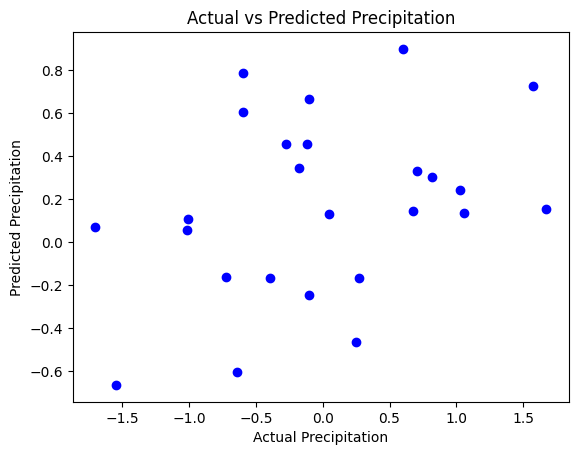

In [17]:
import matplotlib.pyplot as plt

# Assuming Y_test and y_pred_r have the same number of samples
plt.scatter(Y_test, y_pred_r, color='blue')
plt.xlabel('Actual Precipitation')
plt.ylabel('Predicted Precipitation')
plt.title('Actual vs Predicted Precipitation')
plt.show()


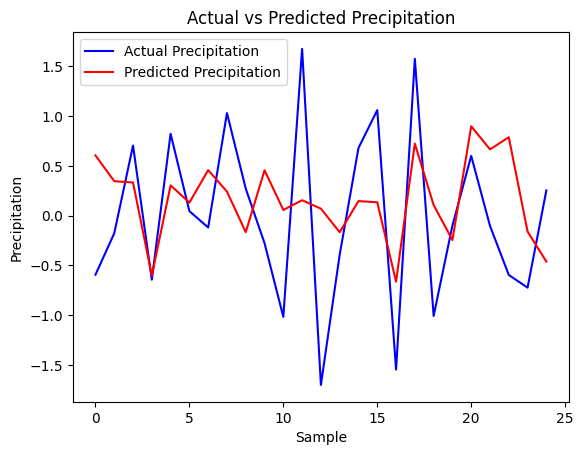

In [18]:
import matplotlib.pyplot as plt

# Assuming Y_test and y_pred_r have the same number of samples
plt.plot(Y_test, label='Actual Precipitation', color='blue')
plt.plot(y_pred_r, label='Predicted Precipitation', color='red')
plt.xlabel('Sample')
plt.ylabel('Precipitation')
plt.title('Actual vs Predicted Precipitation')
plt.legend()
plt.show()


 Using XgBoost Model

In [19]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, Y_train)
y_pred_xgb = xgb.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_xgb = mean_squared_error(Y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(Y_test, y_pred_xgb)

print("Mean Squared Error (MSE) for XGBoost:", mse_xgb)
print("Mean Absolute Error (MAE) for XGBoost:", mae_xgb)


Mean Squared Error (MSE) for XGBoost: 1.1563878176498148
Mean Absolute Error (MAE) for XGBoost: 0.9197914873507471


Using SVR Model

In [20]:
from sklearn.svm import SVR

# Create the SVR model
svr = SVR()

# Fit the model to the training data
svr.fit(X_train, Y_train)

# Make predictions
y_pred_svr = svr.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(Y_test, y_pred_svr)
mae_svr = mean_absolute_error(Y_test, y_pred_svr)

print("Mean Squared Error (MSE) for SVR:", mse_svr)
print("Mean Absolute Error (MAE) for SVR:", mae_svr)


Mean Squared Error (MSE) for SVR: 0.7830404394836602
Mean Absolute Error (MAE) for SVR: 0.7379570839257643


Using Lasso Regression Model

In [21]:
from sklearn.linear_model import Lasso, Ridge

# Create the Lasso Regression model
lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization

# Fit the model to the training data
lasso.fit(X_train, Y_train)

# Make predictions
y_pred_lasso = lasso.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(Y_test, y_pred_lasso)

print("Mean Squared Error (MSE) for Lasso Regression:", mse_lasso)
print("Mean Absolute Error (MAE) for Lasso Regression:", mae_lasso)


Mean Squared Error (MSE) for Lasso Regression: 0.7199542896759636
Mean Absolute Error (MAE) for Lasso Regression: 0.6740696557954616


Using ElasticNet Regression Model

In [22]:
from sklearn.linear_model import ElasticNet

# Create the ElasticNet Regression model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # You can adjust alpha and l1_ratio as needed

# Fit the model to the training data
elastic_net.fit(X_train, Y_train)

# Make predictions
y_pred_elastic = elastic_net.predict(X_test)

# Evaluate the model
mse_elastic = mean_squared_error(Y_test, y_pred_elastic)
mae_elastic = mean_absolute_error(Y_test, y_pred_elastic)

print("Mean Squared Error (MSE) for ElasticNet Regression:", mse_elastic)
print("Mean Absolute Error (MAE) for ElasticNet Regression:", mae_elastic)


Mean Squared Error (MSE) for ElasticNet Regression: 0.71753752731956
Mean Absolute Error (MAE) for ElasticNet Regression: 0.6713733514152949


In [25]:
mse_values = [ mse_r, mse_xgb, mse_svr, mse_lasso, mse_elastic]
mae_values = [ mae_r, mae_xgb, mae_svr, mae_lasso, mae_elastic]
model_names = [ 'Random Forest', 'XGBoost', 'SVR', 'Lasso', 'ElasticNet']


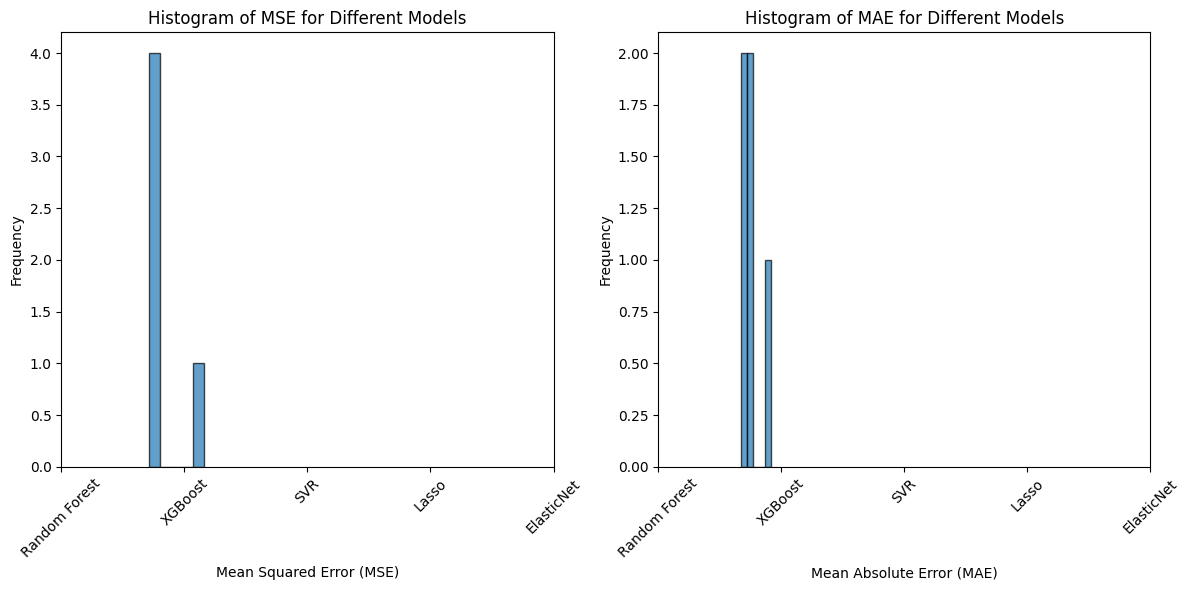

In [30]:
# Create a figure with subplots for MSE and MAE
plt.figure(figsize=(12, 6))

# Plot histograms for MSE
plt.subplot(1, 2, 1)
plt.hist(mse_values, bins=5, edgecolor='k', alpha=0.7)
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Frequency')
plt.title('Histogram of MSE for Different Models')

plt.xticks(rotation=45)
plt.xticks(range(len(model_names)), model_names)


# Plot histograms for MAE
plt.subplot(1, 2, 2)
plt.hist(mae_values, bins=5, edgecolor='k', alpha=0.7)
plt.xlabel('Mean Absolute Error (MAE)')
plt.ylabel('Frequency')
plt.title('Histogram of MAE for Different Models')

# Display the model names as x-axis labels
plt.xticks(rotation=45)
plt.xticks(range(len(model_names)), model_names)

# Show the plots
plt.tight_layout()
plt.show()
